# Linear Models for Classification

We have looked at Linear Models for regression where we have used models to predict a continous floating point number. In this notebook we will look at classification.

In classification, the goal is to predict a class label, which is a choice from a predefinedlist of possibilities. Classification can be separated into two types: `Binary Classification` and `Multiclass Classification`

`Binary classification` is distinguishing between exactly two classes. It can be thought of as a True/False question. Predicting whether a news article is fake or not is an example of binary classification.

`Multiclass Classification` is classification between multiple classes. For example, a model predicting an animal based on a list of attributes for numerous animals is multiclass classification.

## Binary classification

Here is an example of a fomula that can be used to binary classification:

`ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0`

As you can see, it is very similar to the one for linear regression. The difference is that a threshold `> 0` is used on the predicted value at zero, which classifies a class to be True or False.

This function is known as the `decision boundary`, where a binary linear classifier classifies two classes based on a line, a plane, or a hyperplane.

## Linear Classification

In [1]:
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):    
    clf = model.fit(X, y)    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,ax=ax, alpha=.7)    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)    
    ax.set_title("{}".format(clf.__class__.__name__))    
    ax.set_xlabel("Feature 0")    
    ax.set_ylabel("Feature 1")
    axes[0].legend()

C:\Users\jsors\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In this figure we can see an example of `Linear SVC` and `Logistic Regression`. The straight lines are `decision bounaries` which seperate the data into two classes (class 0 and class 1) based on two features (feature 0 and feature 1).

## Logistic Regression

### Logistic function

The logistic function is defined as:

$$
f(x) = \dfrac{1}{1 + e^{-x}}
$$

where `e` is the numerical constant Euler's number and `x` is a input we plug into the function.

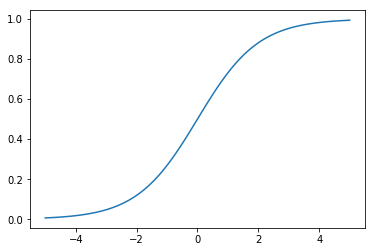

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

li = np.linspace(-5, 5, 100)
np.append(li, [100, 100000000])
l = [sigmoid(x) for x in li]
plt.plot(li, l)


Here we create a list of numbers between -5 and 5, and apply the logistic function to them.

As you can see, as long as the mean value is zero, we can plug in positive and negative values into the function and always get out a consisten transform into the new range.

Note that if the data isn't somewhat nomalized close to zero, we might lose information. If we plug in 100 or 10000 they will both end up close to 1.

Logistic regression is commonly used to estimate the probability than an instance belongs to a particular class. In a binary logistic classifier if the estimated probability is less or equal to 0.5, then the model predicts that the instance belongs to the default class ( class 0), otherwise it predicts it belongs to class 1.

### Lets look at and example of Logistic Regression with sklearn:
In this example we use the the iris dataset, which contains the sepal and petal lengths and withs of 150 iris flowers of three different species: Iris-Setosa, Iris-Virginica and Iris-Versicolor. 

![image](https://cdn-images-1.medium.com/max/720/1*7bnLKsChXq94QjtAiRn40w.png)
![image](http://www.robosoup.com/wp-content/uploads/2016/02/iris_petal_sepal-278x300.png)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
classes = [iris.target_names[x] for x in iris.target]
df.insert(4, 'Labels', classes)
df = df.sort_values(['sepal width (cm)'])

display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Labels
60,5.0,2.0,3.5,1.0,versicolor
62,6.0,2.2,4.0,1.0,versicolor
119,6.0,2.2,5.0,1.5,virginica
68,6.2,2.2,4.5,1.5,versicolor
41,4.5,2.3,1.3,0.3,setosa


Lets make a binary logistic classifier based on one feature the `sepal length`.

In [4]:
# Lets get the petal length at the 1st column
X = iris.data[:, 2].reshape(-1,1)

# We will check if flowers are either virginica or not (virginica == 2)
y = (iris.target == 2).astype(np.int)

Let's plot it:

Text(0.5,0,'Petal length (cm)')

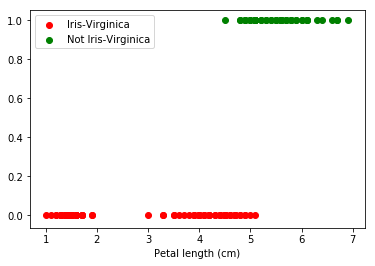

In [5]:
fig, ax = plt.subplots()
for c in [0, 1]:
    X1 = [x for x, y in zip(X, y) if y == c]
    y1 = [y for y in y if y == c]
    color = 'red' if c == 0 else 'green'
    label = 'Iris-Virginica' if c == 0 else 'Not Iris-Virginica'
    ax.scatter(X1, y1, c=color, label = label)
    ax.legend()
plt.xlabel('Petal length (cm)')

Lets create the model and fit the data.

In [6]:
# C determines the strength of the regularization, higher values means less regularization
# multi_class = 'ovr' means that it is a binary classifier
logreg = LogisticRegression(C = 4, multi_class = 'ovr')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, y)

LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

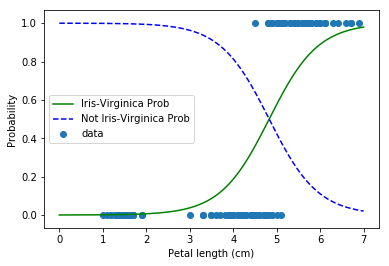

In [7]:
X_new = np.linspace(0, 7, 1000).reshape(-1, 1)

# make a vector of prediction probablity values for all datapoints in X_new
y_proba = logreg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica Prob")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica Prob")
plt.scatter(X, y, label='data')

plt.xlabel('Petal length (cm)')
plt.ylabel('Probability')
plt.legend(loc='best')

As you can see logistic regression outputs both the probability of the flowers either being Iris-Virginica or them not being Iris-Virginica.

Notice how the probability of the class changes with the petal length. At 7 cm the classifier is very confident that the flower is Iris-Virginica, while at about 4.8 cm the probability is close to 0.5 (50%).

In [8]:
print('7 cm:', logreg.predict_proba([[7]]))

print('4.8 cm:', logreg.predict_proba([[4.8]]))

print('2 cm:', logreg.predict_proba([[2]]))


7 cm: [[0.02048555 0.97951445]]
4.8 cm: [[0.51214137 0.48785863]]
2 cm: [[0.99351955 0.00648045]]


## Excersise 

Your task is to to create a multinomial logistic classifier which can distingish all the 3 flower types: Iris-Virginca, Iris-Setosa, and Iris-Versicolor.

You will also use two features instead of one, petal length and petal width (the last two columns)

With the trained classifier predict which type of flower a flower with `petal length: 1.4 cm` and `sepal width: 0.2 cm` is.

`Hint:` When you create the LogistcRegression() object you can set it to be multinomial with `multi_class='multinomial'`.

### Solution

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the last two features.
y = iris.target

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, y)

print(iris.target_names)
print(logreg.predict_proba([[1.4, 0.2]]))

['setosa' 'versicolor' 'virginica']
[[1.00000000e+00 1.71094301e-10 9.66974094e-26]]


Let's plot our classifier:

NameError: name 'Y' is not defined

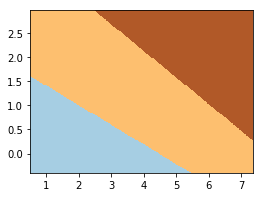

In [10]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

## Linear SVM

A `Support Vector Machine` is a classifier that offers very high accuracy compared to other classifiers such as logistic regression.
The classifier separates data points using a hyperplane with the largest amount of margin, in order to classify data.


![image](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

### Lets look at an example in sklearn

Let's generate some data:

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

Let's create our classifier:

In [ ]:
from sklearn.svm import SVC # Support Vector Classifier

# fit the model, don't regularize for illustration purposes
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)

Let's plot the decision boundary and its margins of our classifier:

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='coolwarm')

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='', cmap='coolwarm')
plt.show()

### Dealing with non-linear and inseparable planes

Some datasets can't be separated using a linear hyperplane.

However, SVM's have a neat trick to deal with this problem called the kernel trick. The kernel trick is able to transform the input space into a higher dimensional space.

In [ ]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(200, noise = 0.1, factor = 0.3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')

This data obviously can't be separated with any linear hyperplane.

There are a variety of kernels which can be used with the SVM algorithm such as: a `Linear Kernel`, `Polynomial Kernel`, `Sigmoid Kernel` or `Radial Basis Function Kernel`.

In this case the `Radial Basis Function Kernel` can be used because it can map input space in infinite dimensional space.

Let's see what it looks like when we apply the radial basis function to our dataset.

In [ ]:
r = np.exp(-(X ** 2).sum(1))

In [ ]:
#!pip install mpl_toolkits
#!pip install ipywidgets

from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='coolwarm')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x_0')
    ax.set_ylabel('x_1')
    ax.set_zlabel('r')

interact(plot_3D, elev=(-90, 90, 5), azim=(-180, 180, 5),
         X=fixed(X), y=fixed(y));

## SVM with the Radial Basis Function Kernel in sklearn

In [ ]:
import plot_helper 
clf = SVC(kernel='rbf', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## Excersise 

1. Implement a SVM classifier to classify the iris flowers (all classes and features).

2. Try to define some kernels for your classifiers and test out different C values. What was the best accuracy you achieved?

Hint on how to define kernel and C value: `clf = SVC(kernel='rbf', C = 10)`

`'linear', 'poly', 'rbf', 'sigmoid'`

In [ ]:
from sklearn.model_selection import train_test_split

# Load the iris data

# Split the data into trainting and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

# Create the classifier object

# Use the classifier to fit the data

# Check accuracy on test data
print("Test set accuracy: {:.2f}".format(your_classifier.score(X_test, y_test)))


# Try with different variations of kernels and C-values. 
# Hint: you can use Grid Search for this.
# What was the best accuracy you achieved?

## Solution

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV

# Load the data set
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)


# Use grid search to test out different combinations of 
param_grid = {'C':[1, 10, 100, 1000],
              'gamma':[10, 1, 0.1, 0.001, 0.0001], 
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

grid.fit(X_train, y_train)

In [111]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid'}

In [110]:
print("Test set accuracy: {:.4f}".format(grid.score(X_test, y_test)))

Test set accuracy: 0.9737
